<a href="https://colab.research.google.com/github/Yashaswi04/Data-Science--VCET/blob/main/Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Real Estate Price Analysis using linear regression


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('/content/Real_Estate.csv')

In [ ]:
df.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [ ]:
df.tail()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620
413,2013-08-01 09:49:41.506402,12.0,90.45606,6,24.952904,121.526395,37.580554


In [ ]:
df.isnull()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
409,False,False,False,False,False,False,False
410,False,False,False,False,False,False,False
411,False,False,False,False,False,False,False
412,False,False,False,False,False,False,False


In [ ]:
df.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [ ]:
df.isnull().sum()

,0
Transaction date,0
House age,0
Distance to the nearest MRT station,0
Number of convenience stores,0
Latitude,0
Longitude,0
House price of unit area,0
DATE,0
TIME,0
DAY,0


In [ ]:
df['Transaction date']=pd.to_datetime(df['Transaction date'])

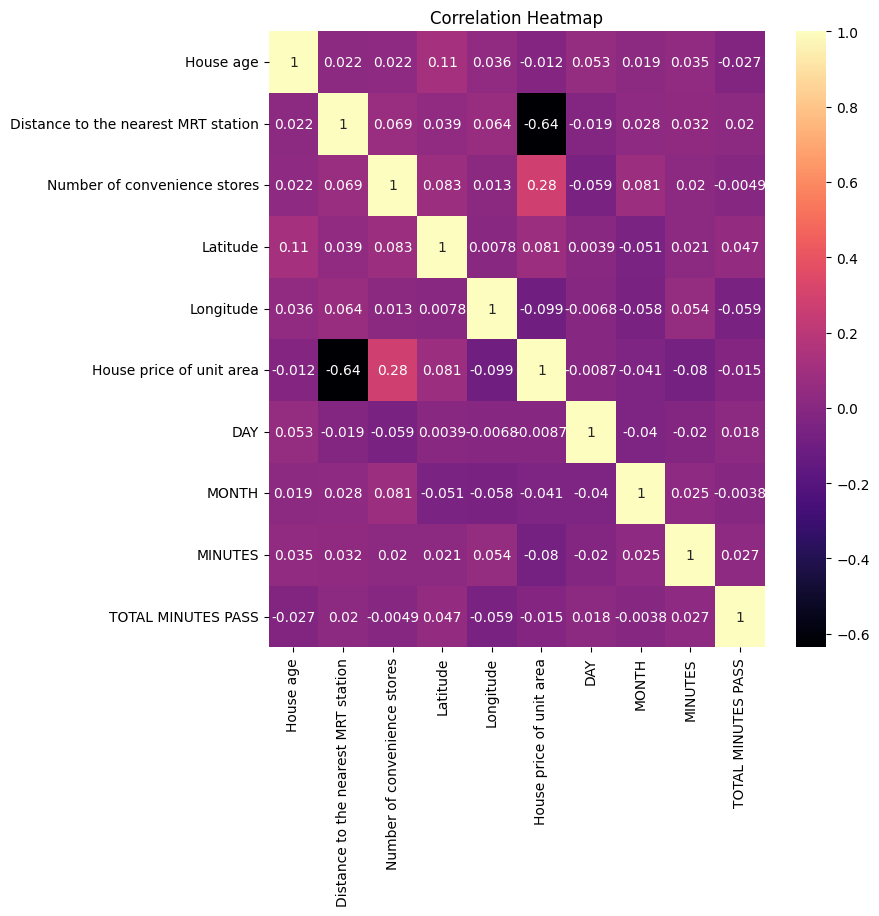

In [ ]:
#Correlateion Heatmap
plt.figure(figsize=(8, 8))

numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='magma')

plt.title('Correlation Heatmap')

plt.show()

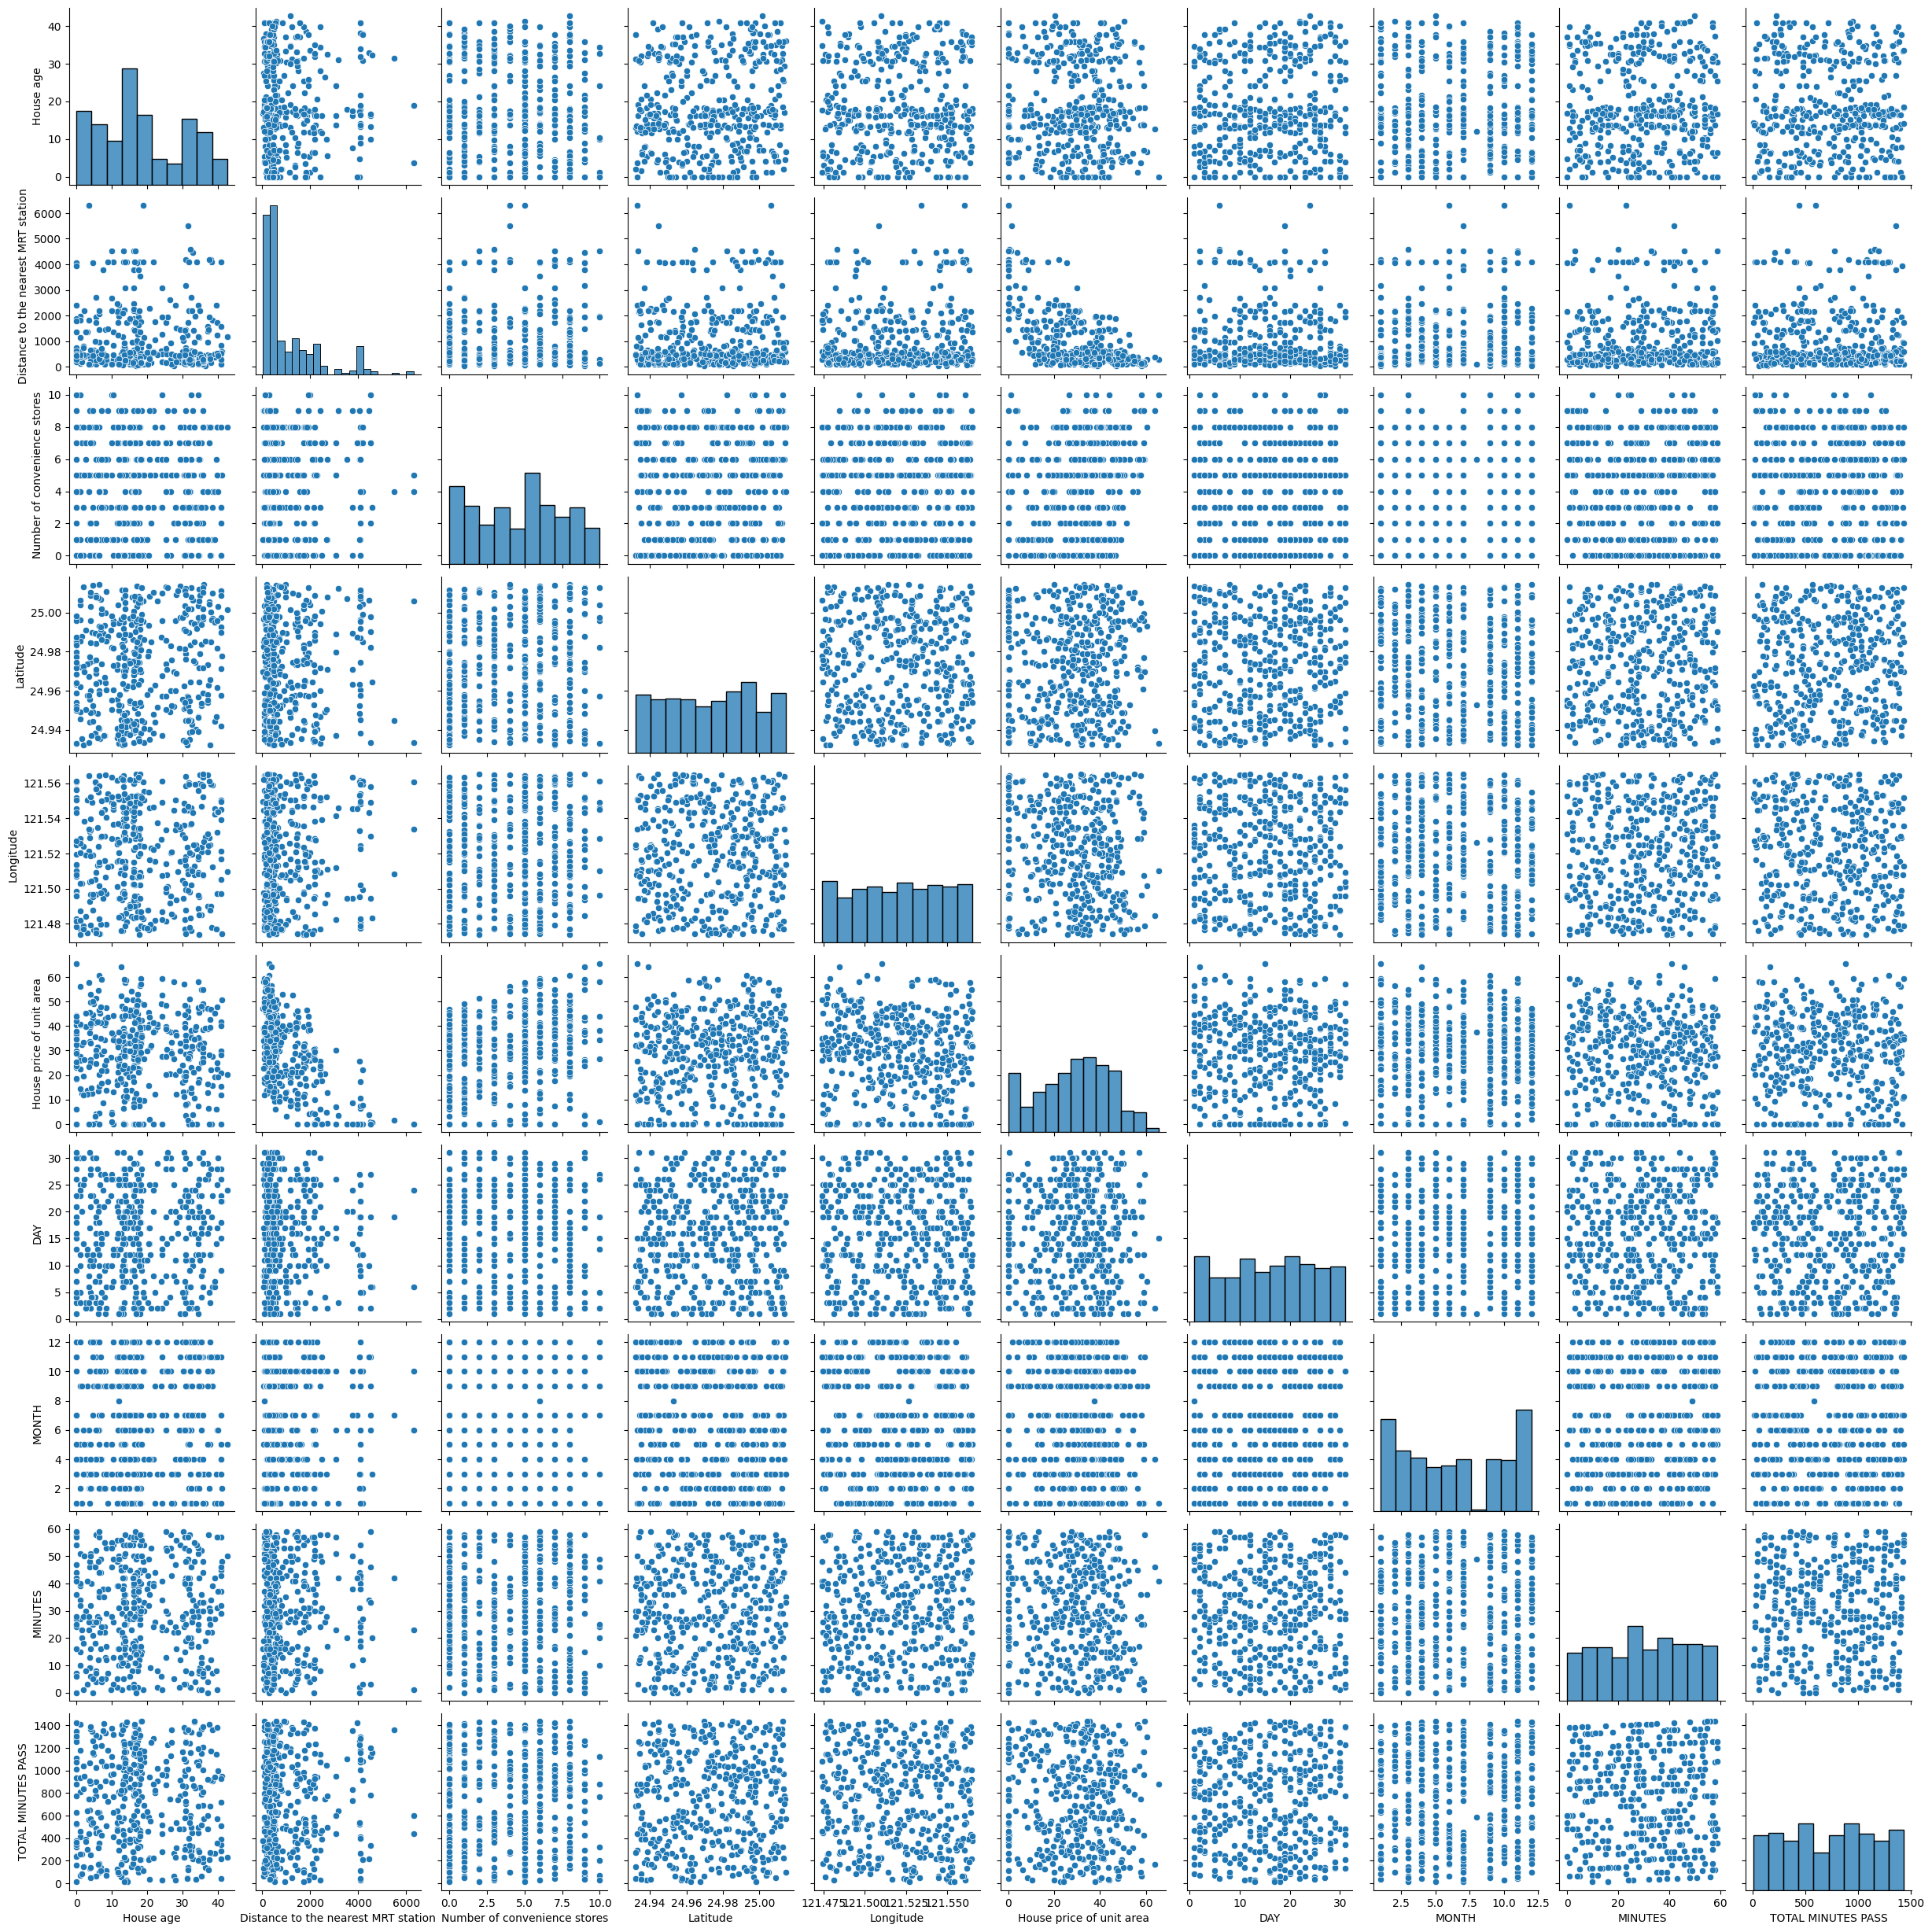

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(df)
plt.show()


Data **Preprocessing**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Exclude 'Transaction date' from columns_for_vif
columns_for_vif = ['House age', 'Distance to the nearest MRT station',
                   'Number of convenience stores', 'Latitude', 'Longitude']

# Create a new DataFrame with only the selected columns for VIF calculation
X = df[columns_for_vif]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,House age,3.495719e+00
1,Distance to the nearest MRT station,1.802904e+00
2,Number of convenience stores,3.233093e+00
3,Latitude,1.036750e+06
4,Longitude,1.036172e+06


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['features']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [ ]:
print(vif_data)

                              features           VIF
0                            House age  3.495719e+00
1  Distance to the nearest MRT station  1.802904e+00
2         Number of convenience stores  3.233093e+00
3                             Latitude  1.036750e+06
4                            Longitude  1.036172e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Transaction date                     414 non-null    datetime64[ns]
 1   House age                            414 non-null    float64       
 2   Distance to the nearest MRT station  414 non-null    float64       
 3   Number of convenience stores         414 non-null    int64         
 4   Latitude                             414 non-null    float64       
 5   Longitude                            414 non-null    float64       
 6   House price of unit area             414 non-null    float64       
 7   DATE                                 414 non-null    object        
 8   TIME                                 414 non-null    object        
 9   DAY                                  414 non-null    int32         
 10  MONTH         

In [ ]:
X.columns

Index(['House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude'],
      dtype='object')


Model Development


In [ ]:

# Define dependent and independent variables
y = df['House price of unit area']  # Dependent variable (target)
X = df.drop('House price of unit area', axis=1) # Independent variables (features)

#Further processing or model building can be done with X and y

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Select only numerical features for scaling
numerical_features = X_train.select_dtypes(include=np.number).columns

# Apply StandardScaler only to numerical features
scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train[numerical_features])
X_test_Scaled = scaler.transform(X_test[numerical_features])


In [ ]:
# Create and train the Linear Regression model using scaled numerical features
model_scaled = LinearRegression()
model_scaled.fit(X_train_Scaled, y_train)

# Make predictions
y_pred_scaled = model_scaled.predict(X_test_Scaled)

# Evaluate the model
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("Scaled Data Results:")
print("Mean Squared Error:", mse_scaled)
print("R-squared:", r2_scaled)

Scaled Data Results:
Mean Squared Error: 126.12523471570765
R-squared: 0.5440851747611098


In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train_Scaled, y_train)
y_pred_rf = rf_model.predict(X_test_Scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)

Random Forest Results:
Mean Squared Error: 125.53930706053248
R-squared: 0.5462031736303603


In [ ]:

import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) # Use appropriate objective function
xgb_model.fit(X_train_Scaled, y_train)
xgb_y_pred = xgb_model.predict(X_test_Scaled)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print("XGBoost Regressor Results:")
print("Mean Squared Error:", xgb_mse)
print("R-squared:", xgb_r2)

XGBoost Regressor Results:
Mean Squared Error: 134.7430206876057
R-squared: 0.5129337846829851


Insights and Visualizations

<Axes: xlabel='Distance to the nearest MRT station', ylabel='Density'>

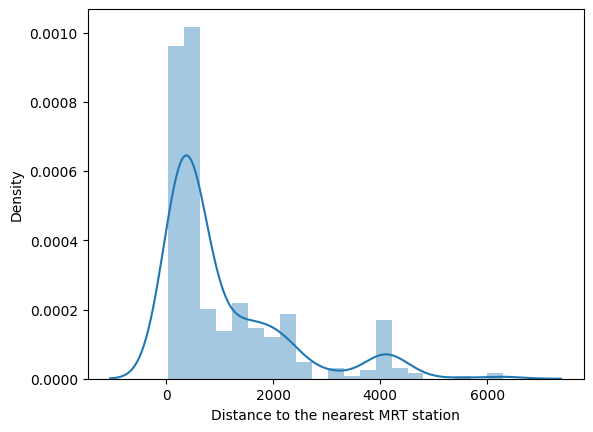

In [ ]:
sns.distplot(df['Distance to the nearest MRT station'])

<Axes: xlabel='Number of convenience stores', ylabel='Density'>

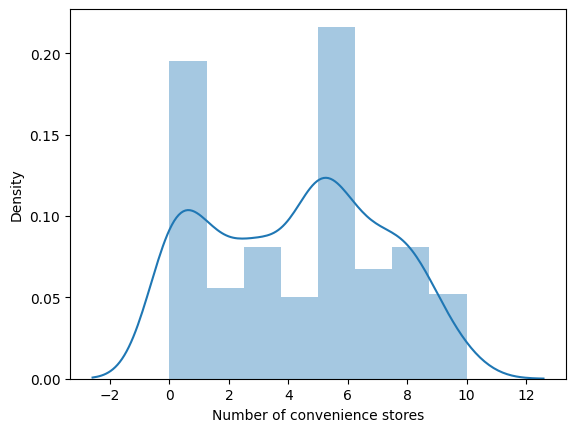

In [ ]:
sns.distplot(df['Number of convenience stores'])

<Axes: xlabel='Latitude', ylabel='Density'>

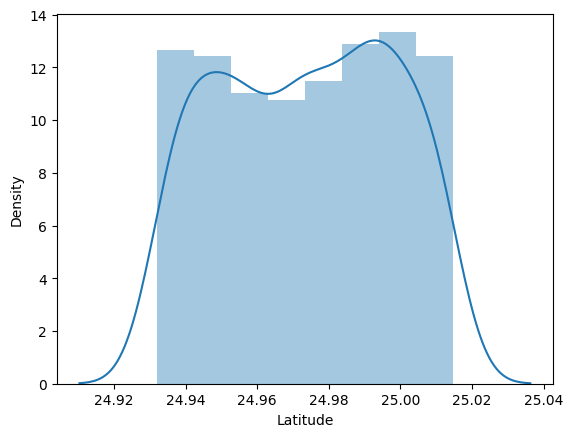

In [ ]:
sns.distplot(df['Latitude'])

<Axes: xlabel='Longitude', ylabel='Density'>

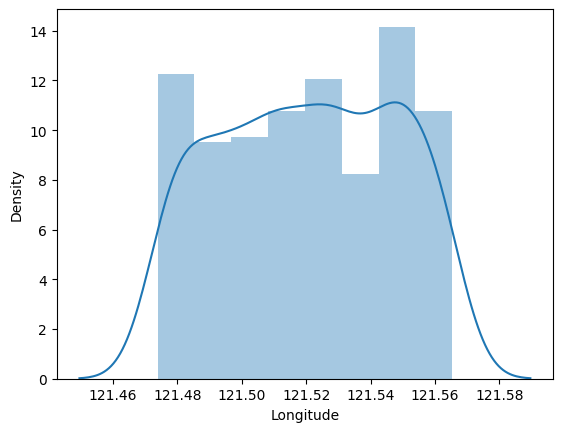

In [ ]:
sns.distplot(df['Longitude'])

<Axes: xlabel='House price of unit area', ylabel='Density'>

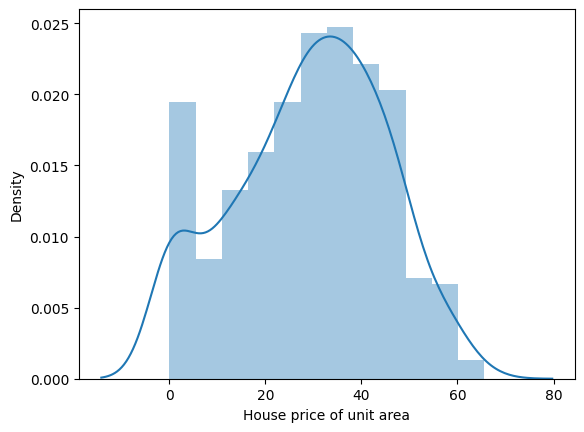

In [ ]:
sns.distplot(df['House price of unit area'])